In [1]:


from src.utils import AirPassengersDF
Y_df = AirPassengersDF # Defined in neuralforecast.utils
Y_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


In [3]:
import pandas as pd

df = pd.read_csv('./data/self_oth_tg_train_df_231123.csv')
df

,tg_id,cons_no,org_no,meter_id,type_code,trade_code,elec_type_code,volt_code,contract_cap,run_cap,...,p61,p65,p69,p73,p77,p81,p85,p89,p93,data_date
0,55850081,600784427,234080801,8000000070617197,1,6820,402,AC00101,92,92,...,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0003,2022-01-05
1,2051937,100152441,234014101,8000000065846384,1,4460,402,AC00101,800,800,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
2,40950052,400055570,234063122,8000000064389717,1,3490,403,AC00101,80,80,...,0.2292,0.0045,-0.0019,-0.0028,0.0000,0.0000,0.0000,0.0000,0.0000,2020-12-19
3,2051937,100152441,234014101,8000000065846384,1,4460,402,AC00101,800,800,...,0.0552,0.0567,0.0557,0.0571,0.0556,0.0558,0.0538,0.0539,0.0561,2022-01-05
4,40950052,400055570,234063122,8000000064389717,1,3490,403,AC00101,80,80,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668150,60050674,700012538,234071201,8000000062234891,1,3130,100,AC00101,630,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
668151,60050674,700012538,234071201,8000000062234891,1,3130,100,AC00101,630,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
668152,55850667,600761080,234080801,112044570,1,4420,0,AC00101,800,800,...,-0.0025,-0.0023,-0.0042,-0.0046,-0.0066,-0.0063,-0.0061,-0.0058,-0.0056,2022-01-05
668153,20650043,200000015,234021223,8000000062230145,1,3710,100,AC01101,31500,31500,...,0.1103,0.1107,0.0947,0.0719,0.0867,0.0601,0.1013,0.0847,0.0834,2022-01-05


In [8]:
# 列名正则
import re
pattern = r'p\d{1,2}'
p = re.compile(pattern)

df_filter = df.filter(regex=pattern, axis=1)

df_filter = pd.concat([df_filter, df['data_date']], axis=1)
df_filter



,p1,p5,p9,p13,p17,p21,p25,p29,p33,p37,...,p61,p65,p69,p73,p77,p81,p85,p89,p93,data_date
0,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,-0.0006,-0.0020,...,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0003,2022-01-05
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0014,-0.0030,0.2294,...,0.2292,0.0045,-0.0019,-0.0028,0.0000,0.0000,0.0000,0.0000,0.0000,2020-12-19
3,0.0541,0.0518,0.0518,0.0519,0.0516,0.0515,0.0519,0.0522,0.0560,0.0549,...,0.0552,0.0567,0.0557,0.0571,0.0556,0.0558,0.0538,0.0539,0.0561,2022-01-05
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668150,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
668151,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2022-01-05
668152,-0.0053,-0.0043,-0.0046,-0.0045,-0.0050,-0.0042,-0.0046,-0.0042,-0.0007,-0.0024,...,-0.0025,-0.0023,-0.0042,-0.0046,-0.0066,-0.0063,-0.0061,-0.0058,-0.0056,2022-01-05
668153,0.0770,0.0916,0.0979,0.0972,0.0617,0.0801,0.0612,0.0762,0.1084,0.1346,...,0.1103,0.1107,0.0947,0.0719,0.0867,0.0601,0.1013,0.0847,0.0834,2022-01-05


In [10]:
df_timemean = df_filter.groupby('data_date').mean()

df_timemean

,p1,p5,p9,p13,p17,p21,p25,p29,p33,p37,...,p57,p61,p65,p69,p73,p77,p81,p85,p89,p93
data_date,,,,,,,,,,,,,,,,,,,,,
2020-11-20,1.506796,1.500953,1.549462,1.496015,1.531622,1.551862,1.589125,1.597112,1.608112,1.587110,...,0.431835,0.403129,0.399793,0.417196,0.431051,0.449629,0.418701,0.427263,0.441936,0.440905
2020-11-21,1.542074,1.559693,1.500881,1.495069,1.516135,1.519700,1.507789,1.525453,1.548150,1.534894,...,0.422526,0.400358,0.387575,0.440219,0.442426,0.461362,0.446443,0.446332,0.478865,0.462022
2020-11-22,1.544137,1.552571,1.537769,1.534345,1.558731,1.570155,1.573877,1.595372,1.600276,1.544593,...,0.441584,0.408496,0.424012,0.418564,0.419340,0.441028,0.454775,0.450363,0.445318,0.465485
2020-11-23,1.531951,1.565015,1.524380,1.490737,1.542150,1.572707,1.568876,1.520063,1.597548,1.485417,...,0.387818,0.414102,0.418067,0.415385,0.437807,0.447692,0.447893,0.428019,0.416911,0.419355
2020-11-24,1.518730,1.481844,1.478233,1.493021,1.509139,1.502557,1.523665,1.533211,1.564709,1.510238,...,0.428369,0.430542,0.421538,0.463253,0.472893,0.485885,0.484053,0.470050,0.472582,0.509322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,0.857815,0.884529,0.973277,0.090388,0.866739,0.881252,0.133635,0.913531,0.210274,0.751426,...,0.205320,0.170075,0.710781,0.615057,0.621953,0.627899,0.143978,0.885987,0.891747,0.881109
2023-11-17,0.877114,0.865699,0.837752,0.094772,0.838067,0.839707,0.115138,0.923157,1.004679,0.212783,...,0.703270,0.755314,0.659712,0.124644,0.621457,0.631929,0.143840,0.132966,0.888424,0.151701
2023-11-18,0.867299,0.866962,0.143952,0.129425,0.888238,0.884402,0.133664,0.894154,0.933088,0.186369,...,0.170512,0.164689,0.661492,0.158957,0.621859,0.861030,0.866653,0.865994,0.868556,0.867658


In [14]:
df_timemean.reset_index(inplace=True)
df_timemean

,data_date,p1,p5,p9,p13,p17,p21,p25,p29,p33,...,p57,p61,p65,p69,p73,p77,p81,p85,p89,p93
0,2020-11-20,1.506796,1.500953,1.549462,1.496015,1.531622,1.551862,1.589125,1.597112,1.608112,...,0.431835,0.403129,0.399793,0.417196,0.431051,0.449629,0.418701,0.427263,0.441936,0.440905
1,2020-11-21,1.542074,1.559693,1.500881,1.495069,1.516135,1.519700,1.507789,1.525453,1.548150,...,0.422526,0.400358,0.387575,0.440219,0.442426,0.461362,0.446443,0.446332,0.478865,0.462022
2,2020-11-22,1.544137,1.552571,1.537769,1.534345,1.558731,1.570155,1.573877,1.595372,1.600276,...,0.441584,0.408496,0.424012,0.418564,0.419340,0.441028,0.454775,0.450363,0.445318,0.465485
3,2020-11-23,1.531951,1.565015,1.524380,1.490737,1.542150,1.572707,1.568876,1.520063,1.597548,...,0.387818,0.414102,0.418067,0.415385,0.437807,0.447692,0.447893,0.428019,0.416911,0.419355
4,2020-11-24,1.518730,1.481844,1.478233,1.493021,1.509139,1.502557,1.523665,1.533211,1.564709,...,0.428369,0.430542,0.421538,0.463253,0.472893,0.485885,0.484053,0.470050,0.472582,0.509322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2023-11-16,0.857815,0.884529,0.973277,0.090388,0.866739,0.881252,0.133635,0.913531,0.210274,...,0.205320,0.170075,0.710781,0.615057,0.621953,0.627899,0.143978,0.885987,0.891747,0.881109
1092,2023-11-17,0.877114,0.865699,0.837752,0.094772,0.838067,0.839707,0.115138,0.923157,1.004679,...,0.703270,0.755314,0.659712,0.124644,0.621457,0.631929,0.143840,0.132966,0.888424,0.151701
1093,2023-11-18,0.867299,0.866962,0.143952,0.129425,0.888238,0.884402,0.133664,0.894154,0.933088,...,0.170512,0.164689,0.661492,0.158957,0.621859,0.861030,0.866653,0.865994,0.868556,0.867658
1094,2023-11-19,0.879066,0.880806,0.880882,0.900824,0.884343,0.881608,0.855202,0.893587,0.188501,...,0.648998,0.706660,0.690377,0.118854,0.608449,0.662903,0.120435,0.863756,0.870111,0.858255


In [24]:
import pandas as pd

# 检查日期是否连续，完整，是否有重复

def check_and_calculate_date_range(df, date_column_name):
    # 确保日期列是日期时间类型
    if df[date_column_name].dtype == 'datetime64[ns]':
        # 检查是否有缺失值
        if df[date_column_name].isnull().any():
            print(f"日期列 '{date_column_name}' 含有缺失值。")
            return None
        else:
            # 检查是否有重复日期
            if df[date_column_name].duplicated().any():
                print(f"日期列 '{date_column_name}' 含有重复日期。")
                return None
            else:
                # 获取日期列的最小值和最大值
                min_date = df[date_column_name].min()
                max_date = df[date_column_name].max()

                # 计算日期范围的天数
                date_range_days = (max_date - min_date).days + 1

                # 频率
                frequency = pd.infer_freq(df[date_column_name])

                print(f"日期范围从 {min_date} 到 {max_date}，共 {date_range_days} 天。")
                return date_range_days, str(min_date), frequency
    else:
        print(f"列 '{date_column_name}' 不是日期时间类型。")
        return None


periods, start_date, freq = check_and_calculate_date_range(df_timemean, 'data_date')


日期范围从 2020-11-20 00:00:00 到 2023-11-20 00:00:00，共 1096 天。


In [23]:
array_2d = df_timemean.drop('data_date', axis=1).values
array_2d = array_2d.flatten()
array_2d

array([1.50679583, 1.50095278, 1.54946204, ..., 0.1351646 , 0.89674025,
       0.13912916])

In [56]:
freq = 'h'
hourly_time_column = pd.date_range(start=start_date, periods=len(array_2d), freq=freq)
hourly_time_column

DatetimeIndex(['2020-11-20 00:00:00', '2020-11-20 01:00:00',
               '2020-11-20 02:00:00', '2020-11-20 03:00:00',
               '2020-11-20 04:00:00', '2020-11-20 05:00:00',
               '2020-11-20 06:00:00', '2020-11-20 07:00:00',
               '2020-11-20 08:00:00', '2020-11-20 09:00:00',
               ...
               '2023-11-20 14:00:00', '2023-11-20 15:00:00',
               '2023-11-20 16:00:00', '2023-11-20 17:00:00',
               '2023-11-20 18:00:00', '2023-11-20 19:00:00',
               '2023-11-20 20:00:00', '2023-11-20 21:00:00',
               '2023-11-20 22:00:00', '2023-11-20 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [57]:
Y_df = pd.DataFrame({'unique_id': 1, 'ds': hourly_time_column, 'y': array_2d})

print(Y_df.dtypes)
Y_df

unique_id             int64
ds           datetime64[ns]
y                   float64
dtype: object


,unique_id,ds,y
0,1,2020-11-20 00:00:00,1.506796
1,1,2020-11-20 01:00:00,1.500953
2,1,2020-11-20 02:00:00,1.549462
3,1,2020-11-20 03:00:00,1.496015
4,1,2020-11-20 04:00:00,1.531622
...,...,...,...
26299,1,2023-11-20 19:00:00,0.647314
26300,1,2023-11-20 20:00:00,0.141019
26301,1,2023-11-20 21:00:00,0.135165
26302,1,2023-11-20 22:00:00,0.896740


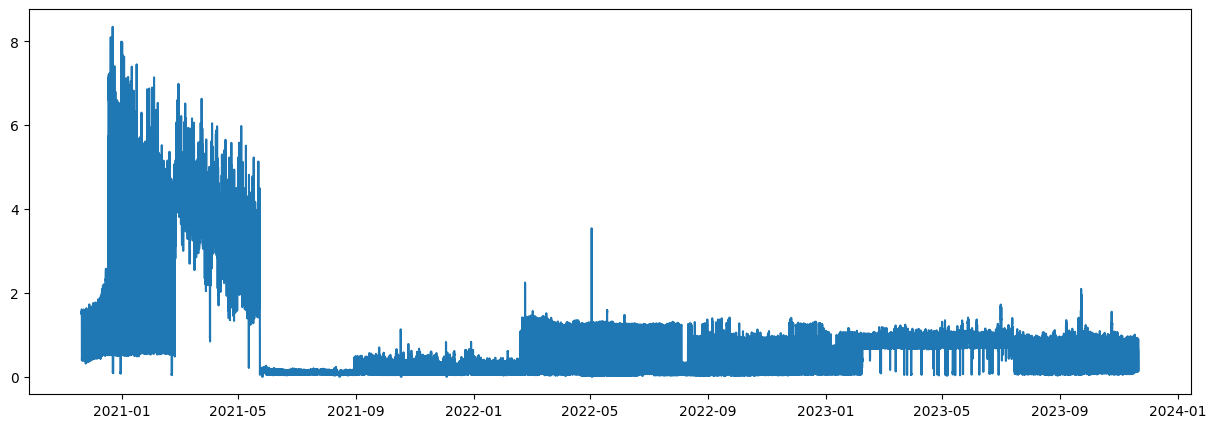

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(Y_df['ds'], Y_df['y'])

In [72]:
from src import NeuralForecast
from src.models import NHITS, PatchTST

horizon = 24*7

Y_train_df = Y_df[:-horizon] 
Y_test_df = Y_df[-horizon:]   


# Try different hyperparmeters to improve accuracy.
# models = [NHITS(h=horizon,                      # Forecast horizon
#                 input_size=2 * horizon,         # Length of input sequence
#                 max_steps=100,                 # Number of steps to train
#                 n_freq_downsample=[2, 1, 1],    # Downsampling factors for each stack output
#                 mlp_units = 3 * [[512, 512]]) # Number of units in each block.
#           ]

models = [
  PatchTST(
    h=horizon,                      # Forecast horizon
    input_size=2 * horizon,         # Length of input sequence
    max_steps=300,                 # Number of steps to train
    val_check_steps = 10,
    early_stop_patience_steps= 5,
    encoder_layers = 3,
    n_heads = 16,    
    hidden_size = 256,
    linear_hidden_size = 512,
  )
]

nf = NeuralForecast(models=models, freq=freq)
nf.fit(df=Y_train_df, val_size=int(len(Y_train_df)/10))

Global seed set to 1


32-true


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

32-true


Predicting: 0it [00:00, ?it/s]

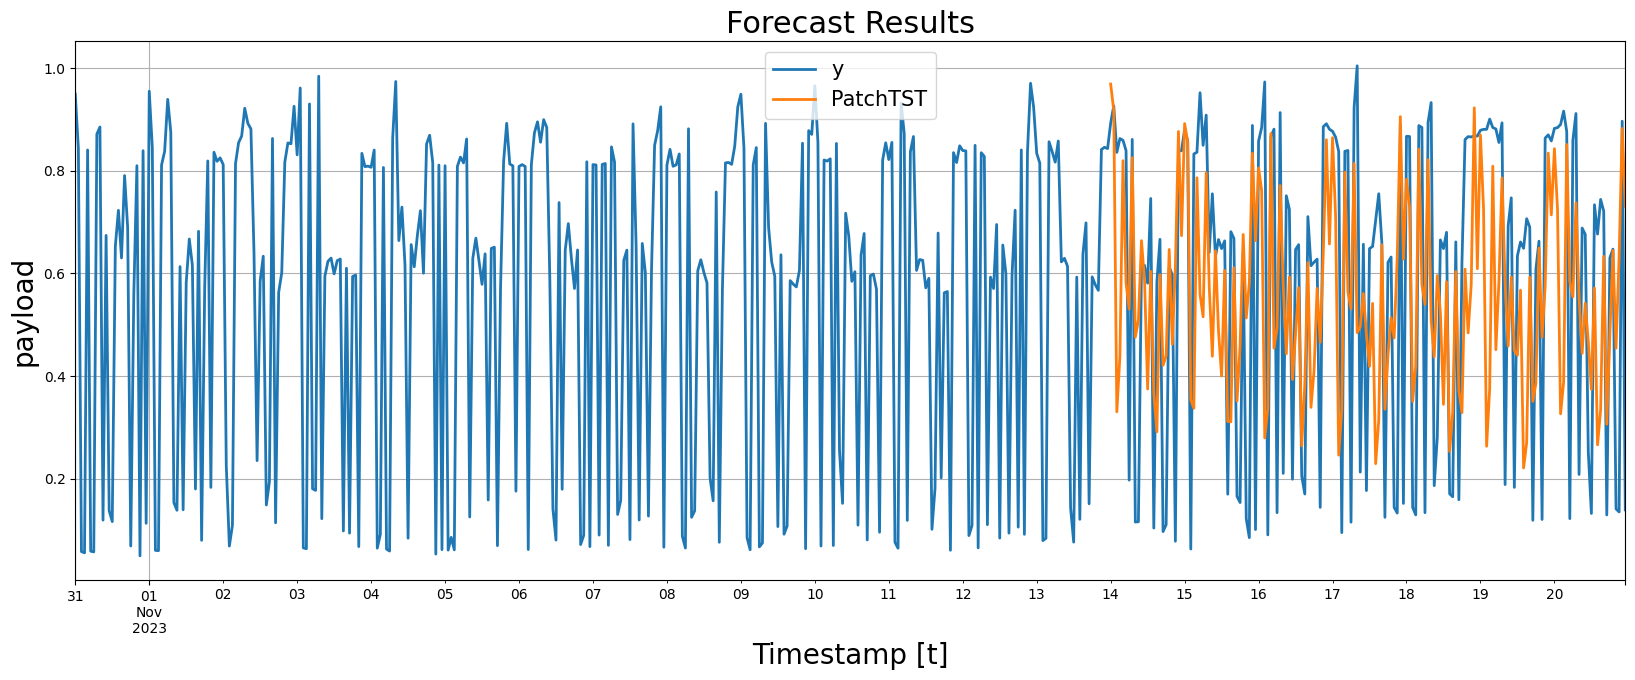

In [73]:

import matplotlib.pyplot as plt


Y_hat_df = nf.predict().reset_index()
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df[-2 * horizon:], Y_hat_df]).set_index('ds')

plot_df[['y', 'PatchTST']].plot(ax=ax, linewidth=2)

ax.set_title('Forecast Results', fontsize=22)
ax.set_ylabel('payload', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [85]:
# 衡量标准
mae = (abs(Y_hat_df['y'] - Y_hat_df['PatchTST'])).mean()
mse = ((Y_hat_df['y'] - Y_hat_df['PatchTST'])**2).mean()

mae, mse

(0.2294365352255774, 0.0788030062857894)